In [1]:
pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
import csv
import numpy as np
import math 

In [24]:
years = []
population_each_year = []


In [25]:
# make years list: 

n = 1950 
while n <= 2024:
    years.append(n)
    n += 1 

# print(years)
print(len(years))

75


In [5]:
# make population_each_year list:
with open('Data for Population of Bangladesh - Sheet1.csv', 'r') as csv_file:
    # Create a CSV reader
    csv_reader = csv.DictReader(csv_file)

    # Iterate through each row in the CSV file
    for row in csv_reader:
        # Extract 'An' value and append it to the list
        # population_each_year.append(float(row['An']))
        # an_value = float(row['An'].replace(',', ''))
        # print(row['An'])
        # remove commas from row['An']
        # num = row['An'].replace(',', '')
        # print(num)
        an_value = float(row['An'])
        population_each_year.append(an_value)


print(population_each_year)

[39728535.0, 40548590.0, 41426885.0, 42329279.0, 43282032.0, 44315548.0, 45407666.0, 46560522.0, 47742791.0, 49004963.0, 50396429.0, 51882769.0, 53461661.0, 55094115.0, 56774465.0, 58500159.0, 60265259.0, 62104488.0, 63995652.0, 65866908.0, 67541860.0, 68376204.0, 69346705.0, 71144818.0, 72947807.0, 74700345.0, 76380080.0, 78137788.0, 80007550.0, 81908151.0, 83929765.0, 86154836.0, 88555336.0, 91045478.0, 93534239.0, 95959099.0, 98271746.0, 100490256.0, 102688833.0, 104893674.0, 107147651.0, 109242834.0, 111272102.0, 113418757.0, 115614891.0, 117793338.0, 119876868.0, 122039226.0, 124350471.0, 126754824.0, 129193327.0, 131670484.0, 134139826.0, 136503206.0, 138789725.0, 140912590.0, 142628831.0, 144135934.0, 145421318.0, 146706810.0, 148391139.0, 150211005.0, 152090649.0, 154030139.0, 155961299.0, 157830000.0, 159784568.0, 161793964.0, 163683958.0, 165516222.0, 167420951.0, 169356251.0, 171186372.0, 172954319.0, 174701211.0]


**Malthusian (Exponential) model**

In [17]:
# first we calculate R: 

Rs = []
for i in range(1, len(population_each_year)):
    R = ((population_each_year[i] - population_each_year[i-1])/ population_each_year[i-1])*100
    Rs.append(R)

# take median of Rs:
median_R = np.median(Rs)
mean_R = median_R/100
print(mean_R)

0.021056274573400695


In [19]:
# change R by 5%:
mean_R = mean_R + 0.10*mean_R
print(mean_R)

0.024319997132277803


In [20]:
# Now we use our model to predict the population each year 

P_0 = population_each_year[0]
population_each_year_predicted = []
for t_n in range(0, len(years)):
    P_n = P_0 * math.exp(mean_R * t_n)
    population_each_year_predicted.append(P_n)

print(population_each_year_predicted)

[39728535.0, 40706577.64867397, 41708697.888495594, 42735488.464981906, 43787556.715942256, 44865524.93071337, 45970030.718238205, 47101727.384206116, 48261284.317477584, 49449387.38602198, 50666739.34260257, 51914060.24044873, 53192087.85916129, 54501578.14110279, 55843305.63853091, 57218063.97173949, 58626666.29847811, 60069945.79492792, 61548756.14851819, 63063972.06287509, 64616489.775201395, 66207227.58639308, 67837126.40420644, 69507150.29979688, 71218287.07795879, 72971548.86140361, 74767972.68942168, 76608621.13128205, 78494582.91473316, 80426973.56997591, 82406936.08949016, 84435641.60410507, 86514290.07571283, 88644111.00703584, 90826364.168867, 93062340.34521344, 95353362.09678397, 97700784.54327254, 100105996.16489984, 102570419.62368748, 105095512.60495023, 107682768.67950456, 110333718.1871028, 113049929.14161599, 115833008.15850075, 118684601.40509827, 121606395.57432847, 124600118.88235407, 127667542.09080583, 130810479.55417284, 134030790.29297747, 137330379.09337017, 

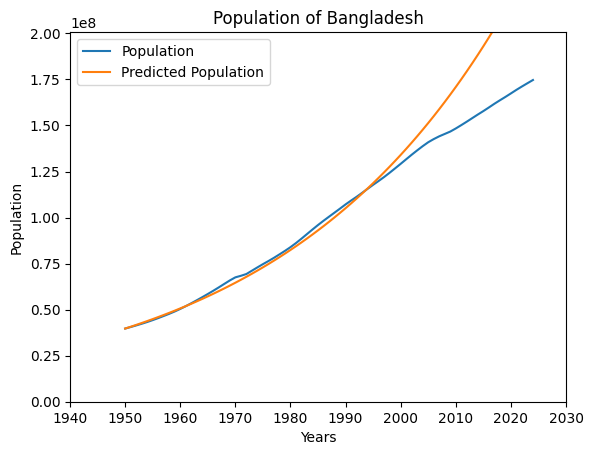

In [21]:
# plot a graph where we plot the population_each_year and population_each_year_predicted versus years

import matplotlib.pyplot as plt

plt.xlim(1940, 2030)
plt.ylim(0, 200701211.0)
plt.plot(years, population_each_year, label='Population')
plt.plot(years, population_each_year_predicted, label='Predicted Population')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population of Bangladesh')
plt.legend()
plt.show()


In [8]:
# calculate the error between the predicted population and the actual population

errors = []
for i in range(len(population_each_year)):
    error = (np.abs(population_each_year[i] - population_each_year_predicted[i]))
    errors.append(error)
overall_error = np.mean(errors)
print(overall_error)


8162213.3832009


**Logistics Model**

In [9]:
# Calculate K and A which are parameters of the model
K = 245090000
# K = 1745090000
A = (K - P_0)/P_0


In [10]:
# Predict the population each year using our logistics model 

population_each_year_predicted = []
for t_n in range(0, len(years)):
    # P_n = P_0 * math.exp(mean_R * t_n)
    P_n = (K)/(1 + A * math.exp(-mean_R * t_n))
    population_each_year_predicted.append(P_n)

print(population_each_year_predicted)

[39728535.0, 40434466.10982791, 41150427.32475367, 41876471.831325755, 42612649.79150087, 43359008.22201049, 44115590.87318186, 44882438.1073787, 45659586.77723595, 46447070.103869565, 47244917.55525128, 48053154.72494529, 48871803.211411715, 49700880.4980889, 50540399.8344737, 51390370.11842579, 52250795.779928684, 53121676.666545995, 54003007.9308176, 54894779.91984557, 55796978.06732466, 56709582.7882765, 57632569.37675066, 58565907.90675863, 59509563.136709884, 60463494.417620756, 61427655.60536847, 62401994.977262765, 63386455.153207764, 64380973.02172556, 65385479.67111077, 66399900.32598316, 67424154.2895013, 68458154.89149597, 69501809.44277632, 70555019.19585553, 71617679.31233549, 72689678.83718094, 73770900.6801052, 74861221.6042782, 75960512.22255751, 77068637.00142904, 78185454.27283287, 79310816.25403403, 80444569.0756834, 81586552.81819835, 82736601.55657527, 83894543.41372924, 85060200.622437, 86233389.59594081, 87413921.00725079, 88601599.87716296, 89796225.6709895, 90

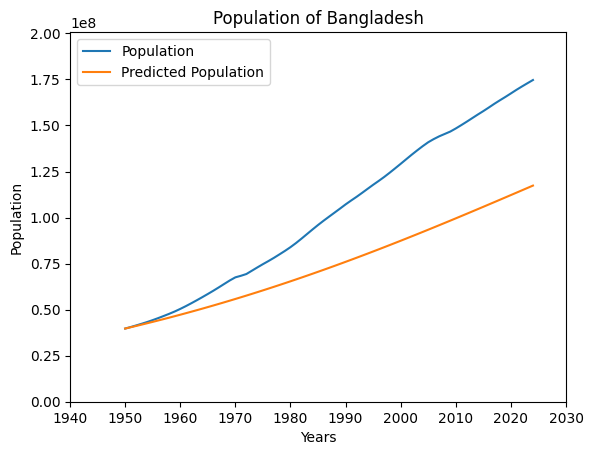

In [11]:
import matplotlib.pyplot as plt

plt.xlim(1940, 2030)
plt.ylim(0, 200701211.0)
plt.plot(years, population_each_year, label='Population')
plt.plot(years, population_each_year_predicted, label='Predicted Population')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population of Bangladesh')
plt.legend()
plt.show()

In [12]:
# calculate the error between the predicted population and the actual population
# error = (actual - predicted)/actual * 100
errors = []
for i in range(len(population_each_year)):
    error = (np.abs(population_each_year[i] - population_each_year_predicted[i]))
    errors.append(error)
overall_error = np.mean(errors)
print(overall_error)

27742717.85522498


**Shallow Neural Network** 

We build a 2 layer MLP now and use that to predict the population. We will also calculate train error vs test error 

In [15]:
population_each_year = []
years = []

with open('Data for Population of Bangladesh - Sheet1.csv', 'r') as csv_file:
    # Create a CSV reader
    csv_reader = csv.DictReader(csv_file)
    # Iterate through each row in the CSV file
    for row in csv_reader:
        an_value = float(row['An'])
        population_each_year.append(an_value)
        
print(population_each_year)
for i in range(1950, 2025):
    years.append(i)
print(years)
print(len(population_each_year))
print(len(years))

[39728535.0, 40548590.0, 41426885.0, 42329279.0, 43282032.0, 44315548.0, 45407666.0, 46560522.0, 47742791.0, 49004963.0, 50396429.0, 51882769.0, 53461661.0, 55094115.0, 56774465.0, 58500159.0, 60265259.0, 62104488.0, 63995652.0, 65866908.0, 67541860.0, 68376204.0, 69346705.0, 71144818.0, 72947807.0, 74700345.0, 76380080.0, 78137788.0, 80007550.0, 81908151.0, 83929765.0, 86154836.0, 88555336.0, 91045478.0, 93534239.0, 95959099.0, 98271746.0, 100490256.0, 102688833.0, 104893674.0, 107147651.0, 109242834.0, 111272102.0, 113418757.0, 115614891.0, 117793338.0, 119876868.0, 122039226.0, 124350471.0, 126754824.0, 129193327.0, 131670484.0, 134139826.0, 136503206.0, 138789725.0, 140912590.0, 142628831.0, 144135934.0, 145421318.0, 146706810.0, 148391139.0, 150211005.0, 152090649.0, 154030139.0, 155961299.0, 157830000.0, 159784568.0, 161793964.0, 163683958.0, 165516222.0, 167420951.0, 169356251.0, 171186372.0, 172954319.0, 174701211.0]
[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 

In [ ]:
# First, we do some data preprocessing


# divide each elem in population_each_year by 10^7
# population_each_year = [x/10000000 for x in population_each_year]
print(population_each_year)
population_each_year = [x/10000000 for x in population_each_year]
print(population_each_year)

In [23]:
# do a train-test split. Take 20% of the data only for training
train_size = int(len(population_each_year) * 0.2)
test_size = len(population_each_year) - train_size
train_population, test_population = population_each_year[0:train_size], population_each_year[train_size:len(population_each_year)]
train_years, test_years = years[0:train_size], years[train_size:len(population_each_year)]
print(len(train_population))
print(len(test_population))
print(len(train_years))
print(len(test_years))
print(train_population)

15
60
15
60
[3.9728535, 4.054859, 4.1426885, 4.2329279, 4.3282032, 4.4315548, 4.5407666, 4.6560522, 4.7742791, 4.9004963, 5.0396429, 5.1882769, 5.3461661, 5.5094115, 5.6774465]


In [24]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


population = np.array(population_each_year)
# print(population)
# make a new array of years that starts from 0 to (2024-1950) and then convert it to a tensor
# years = years - 1950
years = np.array(years)
# print(len(years))
# print(len(population))

# make the data into tensors
years_tensor = torch.from_numpy(years).float().view(1, -1)
population_tensor = torch.from_numpy(population).float().view(1, -1)
# print(years_tensor)
# print(population_tensor)


# years_tensor = torch.from_numpy(years).float().view(-1, 1)
# population_tensor = torch.from_numpy(population_each_year).float().view(-1, 1)

class PopulationPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PopulationPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True) # add bias = False
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, 2*hidden_size, bias=True)
        self.fc3 = nn.Linear(2*hidden_size, hidden_size, bias=True)
        self.fc4 = nn.Linear(hidden_size, output_size, bias=True)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc4(x)
        return x

# Define the model, loss function, and optimizer
input_size = 75
hidden_size = 5
output_size = 75

model = PopulationPredictor(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
# use stochastic gradient descent as the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001)
# optimizer = optim.Adam(model.parameters(), lr=0.00001)

num_epochs = 100000000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(years_tensor)
    loss = criterion(outputs, population_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    predicted_population = model(years_tensor).numpy()

print("Predicted Population:", predicted_population.flatten())

Epoch [100/100000000], Loss: 123.7695
Epoch [200/100000000], Loss: 123.5717
Epoch [300/100000000], Loss: 123.3741
Epoch [400/100000000], Loss: 123.1769
Epoch [500/100000000], Loss: 122.9799
Epoch [600/100000000], Loss: 122.7833
Epoch [700/100000000], Loss: 122.5870
Epoch [800/100000000], Loss: 122.3910
Epoch [900/100000000], Loss: 122.1954
Epoch [1000/100000000], Loss: 122.0000
Epoch [1100/100000000], Loss: 121.8050
Epoch [1200/100000000], Loss: 121.6102
Epoch [1300/100000000], Loss: 121.4158
Epoch [1400/100000000], Loss: 121.2217
Epoch [1500/100000000], Loss: 121.0279
Epoch [1600/100000000], Loss: 120.8344
Epoch [1700/100000000], Loss: 120.6412
Epoch [1800/100000000], Loss: 120.4483
Epoch [1900/100000000], Loss: 120.2558
Epoch [2000/100000000], Loss: 120.0635
Epoch [2100/100000000], Loss: 119.8716
Epoch [2200/100000000], Loss: 119.6799
Epoch [2300/100000000], Loss: 119.4886
Epoch [2400/100000000], Loss: 119.2976
Epoch [2500/100000000], Loss: 119.1068
Epoch [2600/100000000], Loss: 118.

KeyboardInterrupt: 

Predicted Population: [ 3.950502   4.032508   4.1203365  4.214956   4.305852   4.409203
  4.5184155  4.6337004  4.7519274  4.8781447  5.017291   5.165925
  5.3238144  5.4870596  5.6550946  5.8276644  6.004174   6.1783285
  6.367968   6.5539055  6.709483   6.7929177  6.889967   7.0697784
  7.2608232  7.425331   7.5933046  7.7690754  7.956052   8.146112
  8.348273   8.57078    8.81083    9.059844   9.308721   9.551207
  9.782471  10.004322  10.22418   10.444664  10.670062  10.87958
 11.082507  11.297173  11.516786  11.734631  11.935467  12.139965
 12.352654  12.611195  12.853595  13.0776415 13.324575  13.560915
 13.789565  14.001852  14.173476  14.324186  14.452724  14.581274
 14.749707  14.931694  15.1196575 15.313608  15.506724  15.693594
 15.8890505 16.089989  16.278988  16.462215  16.65269   16.846218
 17.029232  17.206024  17.380714 ]


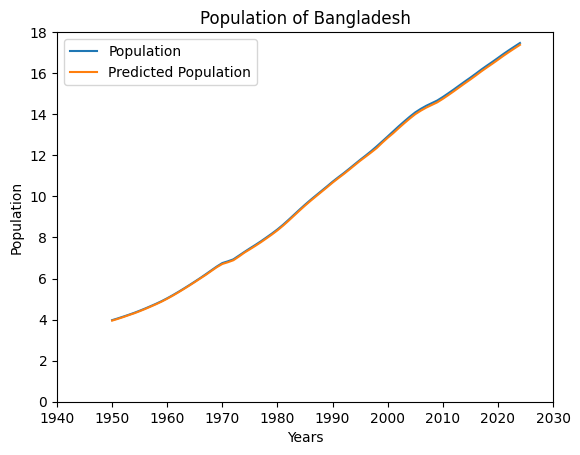

In [25]:
# Evaluate the model
with torch.no_grad():
    predicted_population = model(years_tensor).numpy()

print("Predicted Population:", predicted_population.flatten())

# turn predicted_population into a list
predicted_population = predicted_population.flatten().tolist()

# plot the model predictions
plt.xlim(1940, 2030)
plt.ylim(0, 18)
plt.plot(years, population_each_year, label='Population')
plt.plot(years, predicted_population, label='Predicted Population')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population of Bangladesh')
plt.legend()
plt.show()

In [56]:
# # plot the model predictions
# plt.xlim(1940, 2030)
# plt.ylim(0, 15)
# plt.plot(years, population_each_year, label='Population')
# plt.plot(years, predicted_population, label='Predicted Population')
# plt.xlabel('Years')
# plt.ylabel('Population')
# plt.title('Population of Bangladesh')
# plt.legend()
# plt.show()
